N	Pi Estimate		RMS Error	Execution Time (s)
10	3.2399259889	0.0983333353	0.0000193119
100	3.1515759869	0.0099833333	0.0000693798
1000	3.1425924869	0.0009998333	0.0007185936
10000	3.1416926519	0.0000999983	0.0120768547


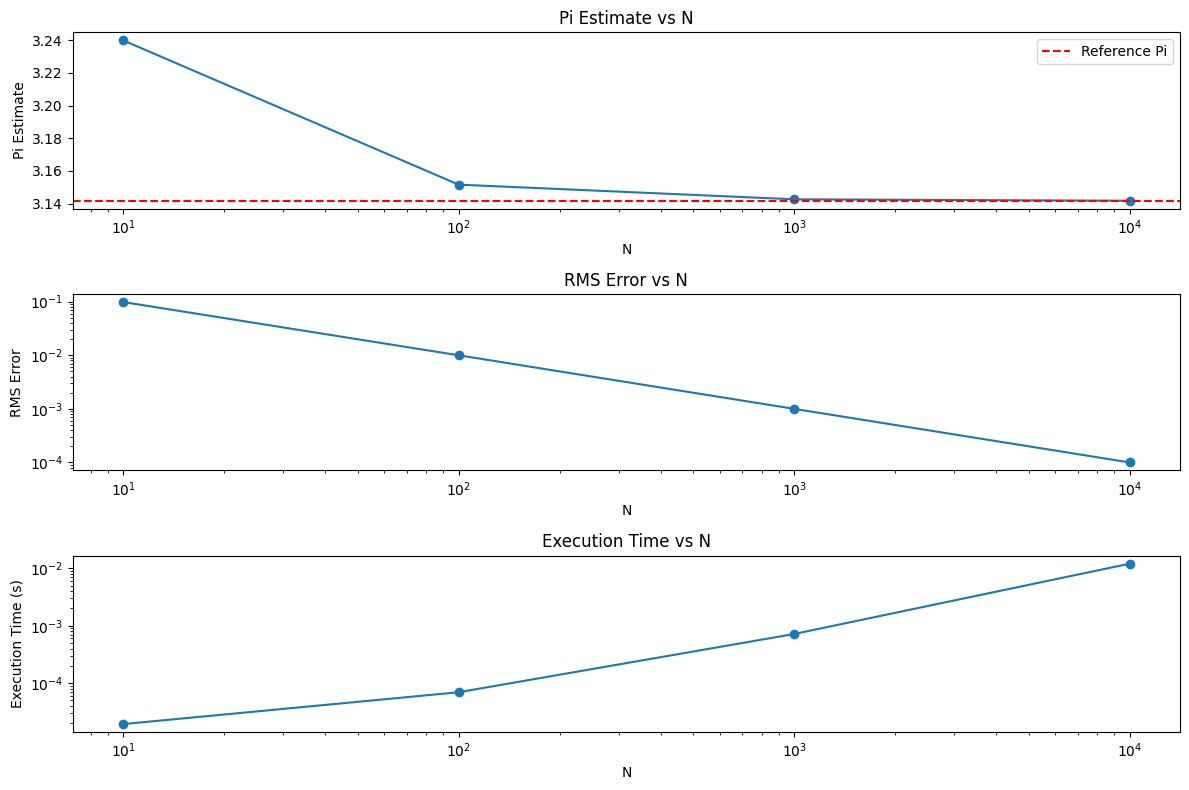

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Fungsi untuk menghitung integral menggunakan metode Riemann
def riemann_integral(f, a, b, N):
    dx = (b - a) / N
    total_area = 0.0
    for i in range(N):
        x = a + i * dx
        total_area += f(x) * dx
    return total_area

# Fungsi untuk dihitung integralnya
def f(x):
    return 4 / (1 + x**2)

# Nilai referensi untuk pi
pi_reference = 3.14159265358979323846

# Variasi nilai N
N_values = [10, 100, 1000, 10000]

# Hasil pengujian
results = []

for N in N_values:
    start_time = time.time()
    pi_estimate = riemann_integral(f, 0, 1, N)
    execution_time = time.time() - start_time
    rms_error = np.sqrt((pi_estimate - pi_reference)**2)
    results.append((N, pi_estimate, rms_error, execution_time))

# Menampilkan hasil pengujian
print("N\tPi Estimate\t\tRMS Error\tExecution Time (s)")
for result in results:
    print(f"{result[0]}\t{result[1]:.10f}\t{result[2]:.10f}\t{result[3]:.10f}")

# Extracting data for plotting
N_values = [result[0] for result in results]
pi_estimates = [result[1] for result in results]
rms_errors = [result[2] for result in results]
execution_times = [result[3] for result in results]

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot Pi Estimate vs N
plt.subplot(3, 1, 1)
plt.plot(N_values, pi_estimates, marker='o')
plt.axhline(y=pi_reference, color='r', linestyle='--', label='Reference Pi')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Pi Estimate')
plt.title('Pi Estimate vs N')
plt.legend()

# Plot RMS Error vs N
plt.subplot(3, 1, 2)
plt.plot(N_values, rms_errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('RMS Error')
plt.title('RMS Error vs N')

# Plot Execution Time vs N
plt.subplot(3, 1, 3)
plt.plot(N_values, execution_times, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs N')

# Adjust layout and show plot
plt.tight_layout()
plt.show()